<a href="https://colab.research.google.com/github/rmorlowski/Regression-Analysis-and-Multivariate-Methods/blob/master/Cluster_Anlaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-means Cluster Analysis

The deliverable is to analyze self-rated survey data from students at Stanford University and their responses to personality attribute questions to find clusters within the dataset. The goal is to find some meaningful sub-groups from the psychological personality assessment data. This will be accomplished by K-means clustering, Ward’s method, and hierarchical agglomerative methods. From these techniques, we will determine if sub-groups may be identified from the data.

This example uses data from public-domain source at Stanford University. 240 student participants' self-ratings on 32 personality attributes. Student survey participants were given an adjective check-list with instructions to self-rate such as: "Rate the extent to which each adjective describes you. Use a 1-to-9 scale, where 1 means 'very much unlike me' and 9 means 'very much like me.' " Source: http://www.stanford.edu/class/psych253/data/personality0.txt

In [0]:
# import packages for this example
import pandas as pd    
from collections import OrderedDict  # to create DataFrame with ordered columns
# special plotting methods
from pandas.tools.plotting import scatter_matrix    
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics  # for silhouette coefficient
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as sm
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas_profiling

In [2]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

K-Means Clustering - The k-means clustering algorithm is a simple unsupervised algorithm that's used for quickly predicting groupings from within an unlabeled dataset.

Predictions are based on...
1)  The number of cluster centers present (k)
2)  Nearest mean values (measured in Euclidian distance between observations)

In [3]:
# Import file to google colaboratory
from google.colab import files
# upload the train dataset
uploaded = files.upload()

Saving student_data.csv to student_data.csv


In [0]:
import io
#  Read in the data.
student_data = pd.read_csv('student_data.csv')

If you like, add your own data to the student_data data frame by self-rating the 32 adjectives on a 1-to-9 scale ...this would provide 241 observations for example...

In [5]:
print('')
print('----- Summary of Input Data -----')
print('')

# show the object is a DataFrame
print('Object type: ', type(student_data))

# show number of observations in the DataFrame
print('Number of observations: ', len(student_data))

# show variable names
variable = student_data.columns
print('Variable names: ', variable)

# show descriptive statistics
pd.set_option('display.max_columns', None)  # do not limit output
print(student_data.describe())

# show a portion of the beginning of the DataFrame
print(student_data.head())


----- Summary of Input Data -----

Object type:  <class 'pandas.core.frame.DataFrame'>
Number of observations:  240
Variable names:  Index(['distant', 'talkative', 'careless', 'hardworking', 'anxious',
       'agreeable', 'tense', 'kind', 'opposing', 'relaxed', 'disorganized',
       'outgoing', 'approving', 'shy', 'disciplined', 'harsh', 'persevering',
       'friendly', 'worrying', 'responsive', 'contrary', 'sociable', 'lazy',
       'cooperative', 'quiet', 'organized', 'critical', 'lax', 'laidback',
       'withdrawn', 'givingup', 'easygoing'],
      dtype='object')
          distant   talkative    careless  hardworking     anxious  \
count  240.000000  240.000000  240.000000   240.000000  240.000000   
mean     3.866667    5.883333    3.412500     6.925000    5.129167   
std      1.794615    1.677732    1.811357     1.370108    1.880305   
min      1.000000    2.000000    1.000000     2.000000    1.000000   
25%      2.000000    5.000000    2.000000     6.000000    4.000000   
50%

In [6]:
print('')
print('----- K-means Cluster Analysis of Variables -----')
print('')


----- K-means Cluster Analysis of Variables -----



**It is good practice to standardize variables prior to clustering standard scores have zero mean and unit standard deviation. However, since the scales are the same I didn't standardize for this assignment.**

In [0]:
#standardized_student_data_matrix = preprocessing.scale(student_data)
variable_cluster_data =  student_data.T

Specify the number of clusters in order to perform K-means cluster analysis on the variables in the study.

In [0]:
kmeans = KMeans(n_clusters = 5, n_init = 25, random_state = 1)
kmeans.fit(variable_cluster_data)
cluster = kmeans.predict(variable_cluster_data)

Create pandas DataFrame for summarizing the cluster analysis results.

In [0]:
variable_kmeans_solution = pd.DataFrame(OrderedDict([('cluster', cluster)]))

Print results of variable clustering one cluster at a time.

In [10]:
for cluster_id in sorted(variable_kmeans_solution.cluster.unique()):
    print()
    print(variable_kmeans_solution.loc[variable_kmeans_solution['cluster'] == \
        cluster_id])## 


    cluster
9         0
28        0
31        0

    cluster
0         1
2         1
8         1
10        1
15        1
20        1
22        1
27        1
29        1
30        1

    cluster
1         2
11        2
12        2
21        2

    cluster
4         3
6         3
13        3
18        3
24        3
26        3

    cluster
3         4
5         4
7         4
14        4
16        4
17        4
19        4
23        4
25        4


The silhouette coefficient is a useful general-purpose index for evaluating the strength of a clustering solution. The original reference is Peter J. Rousseeuw (1987). “Silhouettes: a Graphical Aid to the Interpretation and Validation of Cluster Analysis”. Computational and Applied Mathematics 20: 53–65. doi:10.1016/0377-0427(87)90125-7. Larger positive values of the silhouette coefficient are preferred. These indicate dense, well separated clusters. Evaluate the clustering solution using the silhouette coefficient

In [11]:
print('Silhouette coefficient for the five-cluster k-means solution: ', 
    metrics.silhouette_score(variable_cluster_data, cluster, 
        metric = 'euclidean'))

Silhouette coefficient for the five-cluster k-means solution:  0.17638659297634862


**A low silhouette coefficient suggests that you try k-means with alternative values for the number of clusters or perhaps this problem is not particularly well suited for cluster analysis.**

**The next result is much the way you would do a market research study looking for market segments... here the segments are clusters of students.**

In [0]:
student_cluster_data =  student_data.T

Specify the number of clusters in order to perform K-means cluster analysis on the variables in the study with no preconceived notions about the number of student segments/clusters. Search across various cluster analysis solutions defined. Each individual k-means solution is defined by the argument n_clusters. Consider selecting a solution based on the silhouette coefficient. For more info on silhouette see http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [13]:
for nclusters in range(2,21): # search between 2 and 20 clusters/segments
    kmeans = KMeans(n_clusters = nclusters, n_init = 25, random_state = 1)
    kmeans.fit(student_cluster_data)
    segment = kmeans.predict(student_cluster_data)  # cluster ids for variables
    print('nclusters: ', nclusters, ' silhouette coefficient: ', 
        metrics.silhouette_score(student_cluster_data, segment, 
            metric='euclidean'))

nclusters:  2  silhouette coefficient:  0.33563371342730786
nclusters:  3  silhouette coefficient:  0.2419619585820747
nclusters:  4  silhouette coefficient:  0.1775560578223245
nclusters:  5  silhouette coefficient:  0.17638659297634862
nclusters:  6  silhouette coefficient:  0.17323764314545081
nclusters:  7  silhouette coefficient:  0.17338128853703322
nclusters:  8  silhouette coefficient:  0.18815600007708663
nclusters:  9  silhouette coefficient:  0.16298435800841243
nclusters:  10  silhouette coefficient:  0.17217586139800328
nclusters:  11  silhouette coefficient:  0.17391427200796733
nclusters:  12  silhouette coefficient:  0.16475651097690158
nclusters:  13  silhouette coefficient:  0.16701131535333572
nclusters:  14  silhouette coefficient:  0.1658285040376694
nclusters:  15  silhouette coefficient:  0.15989232008902704
nclusters:  16  silhouette coefficient:  0.13990483191766967
nclusters:  17  silhouette coefficient:  0.13074656035240106
nclusters:  18  silhouette coeffici

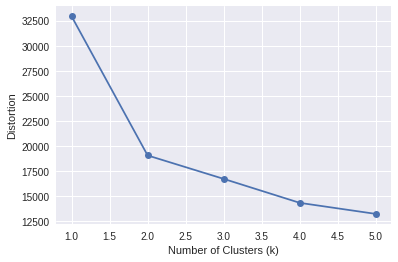

In [14]:
distortions = []
K_to_try = range(1, 6)

for i in K_to_try:
    model = KMeans(
            n_clusters=i,
            init='k-means++',
            n_jobs=-1,
            random_state=1)
    model.fit(student_cluster_data)
    distortions.append(model.inertia_)
plt.plot(K_to_try, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

The “elbow” seems to be located at k = 2. This mean the distortion will not be decreased significantly if we tell the algorithm to use a larger number of clusters, hence the clustering result might be too complicated and not “natural”.

**Results suggest that a two-cluster/segment solution is best.**

In [15]:
print('')
print('----- Solution for Two Student Segments -----')
print('')
kmeans = KMeans(n_clusters = 2, n_init = 25, random_state = 1)
kmeans.fit(student_cluster_data)
segment = kmeans.predict(student_cluster_data)  # cluster index


----- Solution for Two Student Segments -----



**Create pandas DataFrame for summarizing the cluster analysis results using OrderedDict to preserve the order of column names.**

In [0]:
student_kmeans_solution = pd.DataFrame(OrderedDict(
    [('student', range(0,len(student_cluster_data))),
    ('segment', segment)]))

To interpret the results of the segmentation review the original ratings data for the two clusters/segments.
Merge/join the segment information with the original student data.

In [0]:
student_segmentation_data = student_kmeans_solution.join(student_data)

The code below will generate the following dendogram:

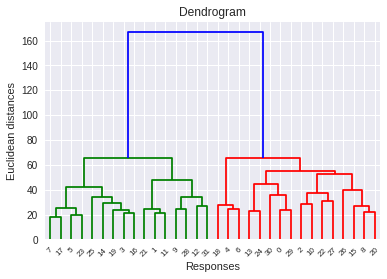

In [18]:
dendrogram = dendrogram(linkage(student_cluster_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Responses')
plt.ylabel('Euclidean distances')
plt.show()

Notice that there are two colours : green and red (exclude blue, which is the root). This mean the best k number of clusters according to Ward’s linkage (method = ‘ward’) is two.

Next, print the means for attributes within each segment.

In [19]:
for segment_id in sorted(student_segmentation_data.segment.unique()):
    print()
    print('Attribute means for segment: ', segment_id)
    this_student_segment_data = student_segmentation_data[ \
        student_segmentation_data.segment == segment_id]
    attributes = this_student_segment_data.ix[:,'distant':'easygoing'].mean()    
    print(attributes)


Attribute means for segment:  0
distant         4.6875
talkative       5.3750
careless        3.5625
hardworking     6.9375
anxious         5.7500
agreeable       6.6250
tense           5.3125
kind            6.8750
opposing        4.0000
relaxed         5.1250
disorganized    3.0000
outgoing        5.3125
approving       5.8750
shy             5.0000
disciplined     6.6250
harsh           3.3750
persevering     7.1875
friendly        6.6875
worrying        5.5625
responsive      7.3125
contrary        4.0000
sociable        5.5625
lazy            4.1250
cooperative     6.6250
quiet           5.4375
organized       6.9375
critical        5.3125
lax             3.9375
laidback        4.6875
withdrawn       4.6875
givingup        3.0625
easygoing       5.8125
dtype: float64

Attribute means for segment:  1
distant         4.6250
talkative       5.0000
careless        2.8125
hardworking     6.8125
anxious         5.1250
agreeable       6.5000
tense           4.8125
kind            6.7500

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [0]:
centers = kmeans.cluster_centers_
centers=centers.T
# turn centers into a df so we can plot the results 
d1 = pd.DataFrame({'zero': centers[:,0]})
d2 = pd.DataFrame({'one': centers[:,1]})
d = d1.join(d2) #column zero and one will be the two groups

**Define the function qhist to show plots of the student data. First for the zero group, then for the one group.**

In [0]:
def qhist(dataframe,var1 ):     
    dataframe[var1].hist(facecolor='b',bins=range(2,8,1))     
    plt.title('Histogram of '+var1)     
    plt.xlabel(var1)     
    plt.ylabel('Frequency')

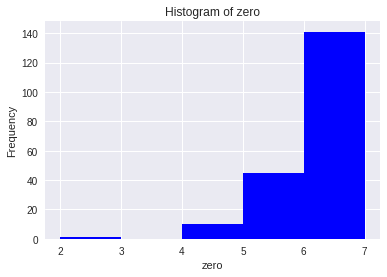

In [22]:
qhist(d,'zero')

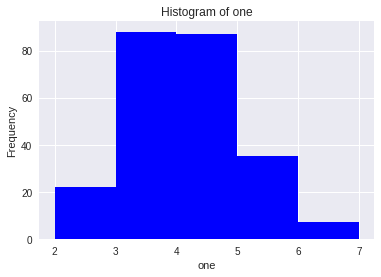

In [23]:
qhist(d,'one')

Very nice separation. Sociologists study this type of data in depth. There may be a grouping of questions based on correlation, or based on some theory. You can try other ways of looking at the data (perhaps using PCA to combine some of the personality questions) then use the k-means code and rerun.

One more example for k-means not related to this example but it is of interest if you have data that appears as blobs. This example is computer generated. The code demonstrates how to plot the blobs and the blob centers. It is taken from p463-464 in the Python Data Science Handbook.

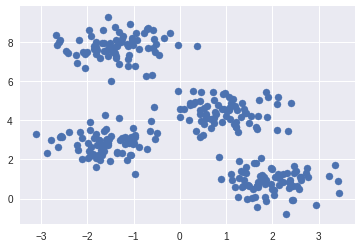

In [24]:
from sklearn.datasets.samples_generator import make_blobs
X,y_true = make_blobs(n_samples=300,centers=4,cluster_std=.60,random_state=0)
plt.scatter(X[:, 0],X[:, 1], s=50);  
 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X) 
y_kmeans = kmeans.predict(X)

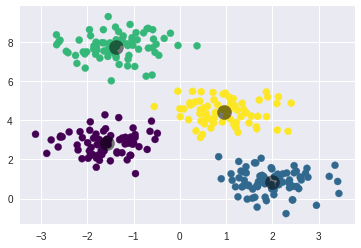

In [25]:
centers = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = y_kmeans, s=50, cmap = 'viridis') 
plt.scatter(centers[:,0],centers[:,1], c='black',s=200,alpha=0.5);

#### Conclusion

K-means clustering is a tool for grouping individuals based on commonality. If we were manufacturing clothing, this may lead us to target manufacturing by various T-shirt sizes. In visualizing our cluster analysis, it was easier to identify the number of variables. By using K-means and analyzing the silhouette coefficient, elbow method, and dendrogram, we identified two sub- groups in the data. The interesting question for the Stanford personality data is; what does this clustering represent?

Due to the fact, this is a personality assessment, this clustering is most likely representative of differences in personality types. These results may be indicative of response differences between introverts and extroverts. The personality assessment data may be sourced from a Myers Briggs or Enneagram test which separates personality types into distinct sub-groups. This study could be viewed as potential differences in physical characteristics (gender) or assessment of intellectual functioning (IQ). However, this is less likely due to the nature of the personality assessment data. In summary, K-means helped us separate these students into two distinct personality groups.